# Exploratory data analysis
In the following notebooks, I will make exploratory data analysis of the bank marketing data to understand the dataset and analyse how to prepare it for classificaiton. The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
The classification goal is to predict if the client will subscrive (yes/no) a term deposit (variable y)\
Dataset is available at: https://data.world/data-society/bank-marketing-data

## Data preparation

In [2]:
# Import packages]
import data_describe as dd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import data_describe as dd
import warnings
warnings.filterwarnings("ignore")

c:\Users\a759429\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
# Settings
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 200)

In [4]:
# Import data
df = pd.read_csv("bank-additional-full.csv", sep=";")

## Data exploration
I will analyse the following:
1. General information: shape, missing values, duplciates, variables types
2. Target variable
3. Categorical variables analysis
4. Numerical variables analysis
5. Data correlation

### 1. General information

In [5]:
# View data sample
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
22116,36,technician,single,high.school,no,no,no,cellular,aug,thu,444,7,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
6074,30,blue-collar,married,basic.9y,unknown,no,yes,telephone,may,tue,39,7,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
30224,20,student,single,high.school,no,yes,no,cellular,apr,thu,195,2,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,no
323,40,services,married,basic.6y,unknown,no,no,telephone,may,mon,199,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
26220,52,management,married,university.degree,no,no,no,telephone,nov,thu,21,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no


In [6]:
# Check data shape
df.shape

(41188, 21)

In [7]:
# View data summary using data describe package
dd.data_summary(df)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
Data Type,int64,object,object,object,object,object,object,object,object,object,int64,int64,int64,int64,object,float64,float64,float64,float64,float64,object
Mean,40.02406,,,,,,,,,,258.28501,2.567593,962.475454,0.172963,,0.081886,93.575664,-40.5026,3.621291,5167.035911,
Standard Deviation,10.42125,,,,,,,,,,259.279249,2.770014,186.910907,0.494901,,1.57096,0.57884,4.628198,1.734447,72.251528,
Median,38.0,,,,,,,,,,180.0,2.0,999.0,0.0,,1.1,93.749,-41.8,4.857,5191.0,
Min,17,,,,,,,,,,0,1,0,0,,-3.4,92.201,-50.8,0.634,4963.6,
Max,98,,,,,,,,,,4918,56,999,7,,1.4,94.767,-26.9,5.045,5228.1,
# Zeros,0,,,,,,,,,,4,0,15,35563,,0,0,0,0,0,
# Nulls,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
% Most Frequent Value,4.73,25.3,60.52,29.54,79.12,52.38,82.43,63.47,33.43,20.94,0.41,42.83,96.32,86.34,86.34,39.41,18.85,18.85,6.96,39.41,88.73


data-describe Summary Widget

In [8]:
# Duplicates check
df.duplicated().sum()

12

In [9]:
# Duplicated rows
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


#### Findings:
* there are 21 variables, 41188 observations
* there are no missing data in df
* there are 12 rows duplicated (same values in all rows)
* no logical data error realized at this stage- variables in logical rabges e.g age: 17-98
* value 999 in column pdays (number of days that passed by after the client was last contacted from a previous campaign) means that client was not previously contacted (information from data documentation)
* as per documentation "duration" variable should be excluded from model as the duration is not known before the call

#### Variables types:

* target variable: y(binary)
* features:
  * categorical:
    * nominal: "job", "marital", "contact", "poutcome", "default", "housing", "loan"
    * ordinal: "education", "month", "day_of_week"
  *   numerical: "age", "campaing", "pdays", "previous", "emp.var.rate", "cons.price.index", "cons.conf.idx", "euribor3m", "nr.employed"

In [10]:
# Drop column duration
df.drop("duration", axis=1, inplace=True)

### 2. Target variable

In [11]:
# Check distribution of target variable
df["y"].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

In [12]:
# Change target variable to binary
df.loc[:, "y"] = df["y"].map(lambda x: 1 if x=="yes" else 0)

#### Findings
Dataset in imbalanced: customers that did not subcribed the product account for 11% of observations.

### 3. Categorical variables analysis

In [13]:
# Create list of categorical variables
categorical_variables = [col for col in df.columns if df[col].dtype=="O"]

<AxesSubplot:>

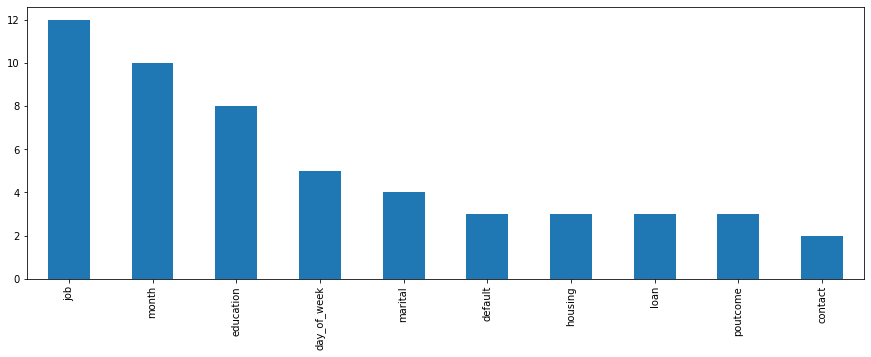

In [14]:
# Check number of categories
df[categorical_variables].nunique().sort_values(ascending=False).plot.bar(figsize=(15,5))

In [15]:
for col in categorical_variables:
    print(f"Variable: {col}")
    print(df[col].value_counts(normalize=True))
    print("\n")


Variable: job
admin.           0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
housemaid        0.025736
unemployed       0.024619
student          0.021244
unknown          0.008012
Name: job, dtype: float64


Variable: marital
married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: marital, dtype: float64


Variable: education
university.degree      0.295426
high.school            0.231014
basic.9y               0.146766
professional.course    0.127294
basic.4y               0.101389
basic.6y               0.055647
unknown                0.042027
illiterate             0.000437
Name: education, dtype: float64


Variable: default
no         0.791201
unknown    0.208726
yes        0.000073
Name: default, dtype: float64


Variable: housing
yes        0.523842
no         0.452122
unknown    0.024036
Name: housing,

In [16]:
# As education is ordinal variable- e.g. university is higher education level than basic I will change it to numerical variable
education_mappings = {"university.degree": 6, "professional.course": 5, "high.school": 4, "basic.9y": 3, "basic.6y": 2, "basic.4y": 1, "illiterate": 0, "unknown": np.NaN}
df.loc[:, "education"] = df["education"].map(education_mappings)

In [17]:
# Fill unknown education with median value and remove from categorical variables
df["education"].fillna(df["education"].median(), inplace=True)
categorical_variables.remove("education")

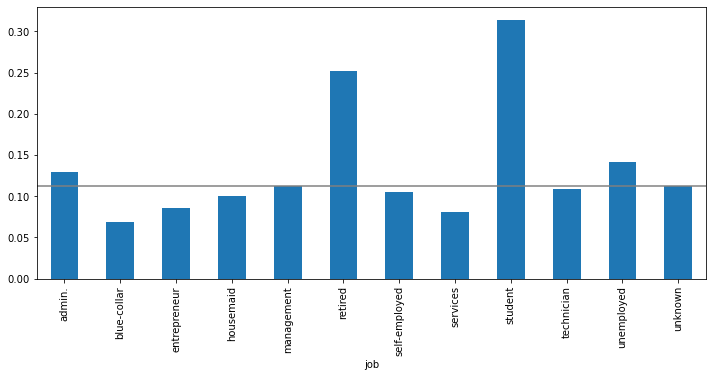

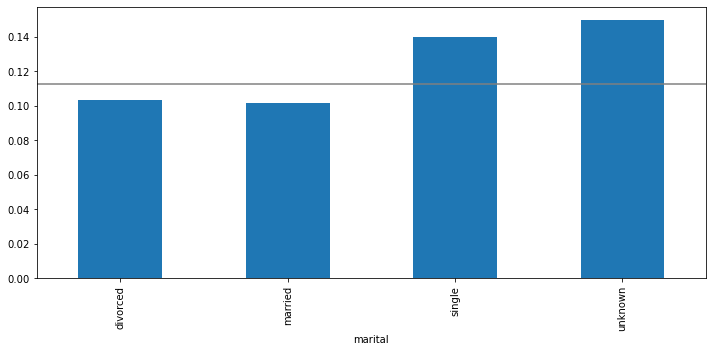

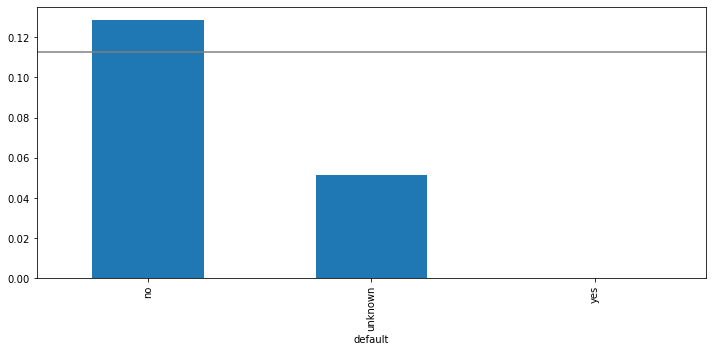

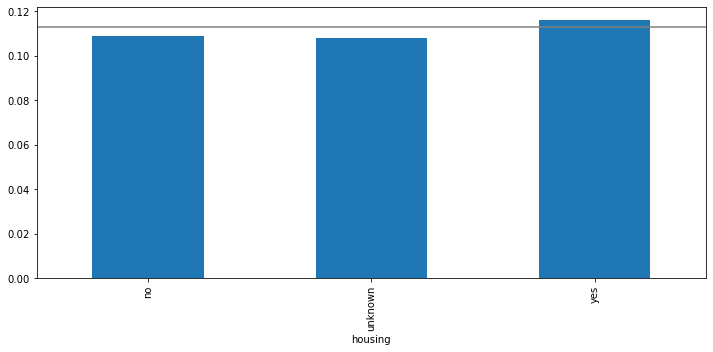

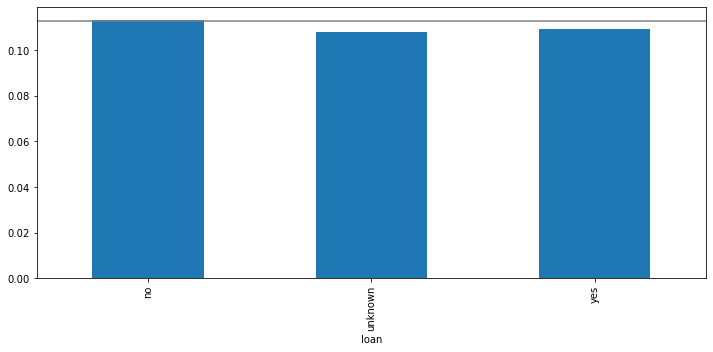

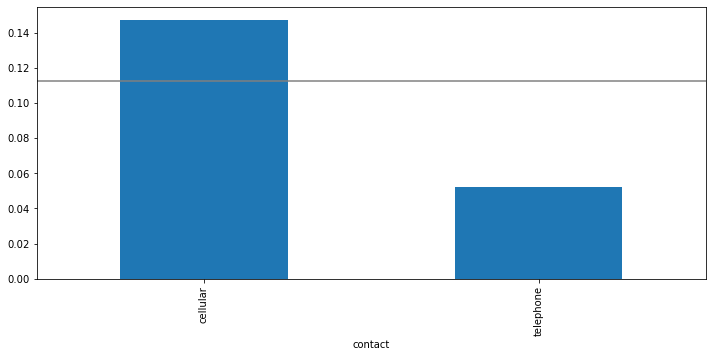

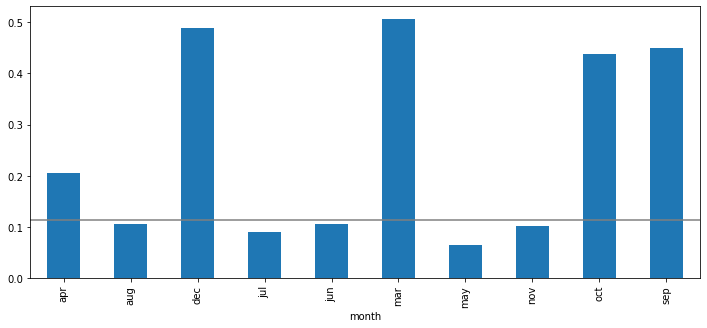

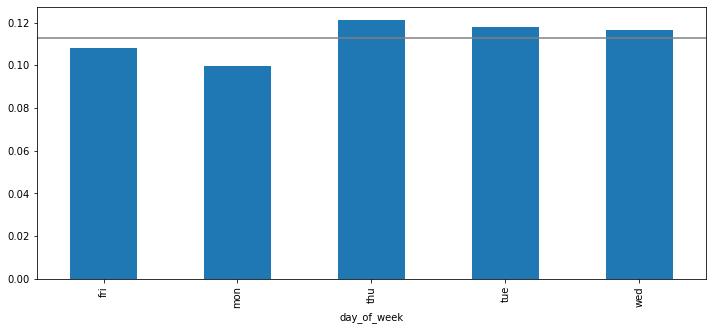

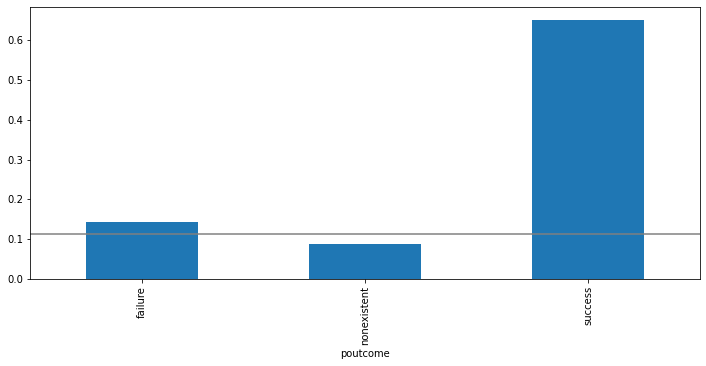

In [18]:
# Analyse the distribution of categorical variables depending on target value
def cat_plot(df, label, col):
    """Plot percentage of positive label per category in comparison to average postive label percentage"""
    df.groupby(col)[label].value_counts(normalize=True).unstack()[1].plot.bar(figsize=(12,5))
    baseline = sum(df[label]==1)/df[label].count()
    plt.axhline(y=baseline, color='grey', linestyle='-')
    plt.show()

for col in categorical_variables:
    cat_plot(df, "y", col)

In [19]:
categorical_variables

['job',
 'marital',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

#### Findings
* All categorical features have no more than 12 categories, there are not many rare cateogires, there is no need for cateogories grouping
* There are a few features that seem to be correlated with label
e.g.:
    * job - students, retired people and admin. are more likely to subscribe the product than other groups
    * marital status- tthere is a giher % of people who subscribed in groups single and unknown status
    * contact - cellular contact more often lead to subscription than telephone one
    * month - there is a higher percentage of people who subscribed when the last contact was in March, October, September or December (as there is no clear correlation between time of the year and % of subscripion - e.g higher percentage at the end of the year only, I will leave month and day of week as categorical variable and not change it into numerical)
    * poutcome - it's much more likely that the person will sirbscribe if the outcome of the previous marketing campaing was "success"

### 4. Numerical variables analysis

In [20]:
# Create a list of numerical variables
numerical_variables = list(set(df.columns) - set(categorical_variables) - set("y"))

In [21]:
# I will replace missing values in "pdays"- 999 with Nan value to be able to properly see data distibution
df["pdays"].replace({999: np.NaN}, inplace=True)

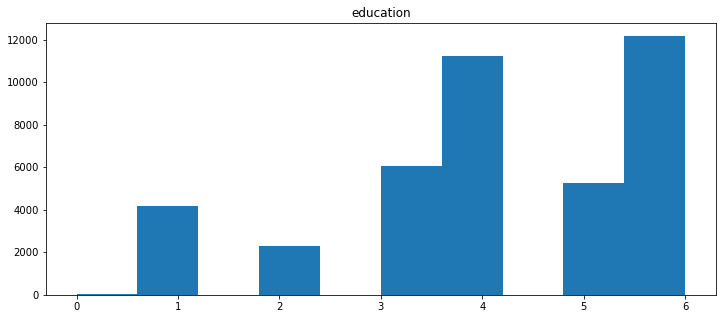

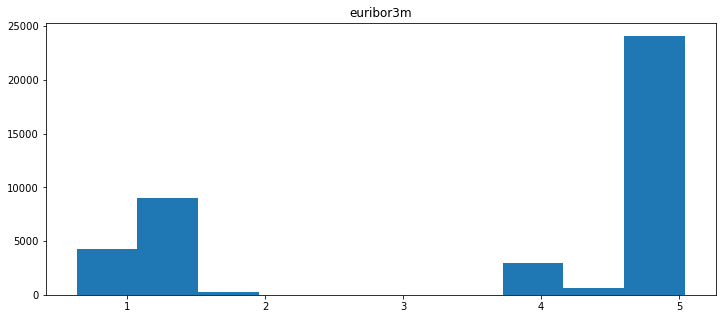

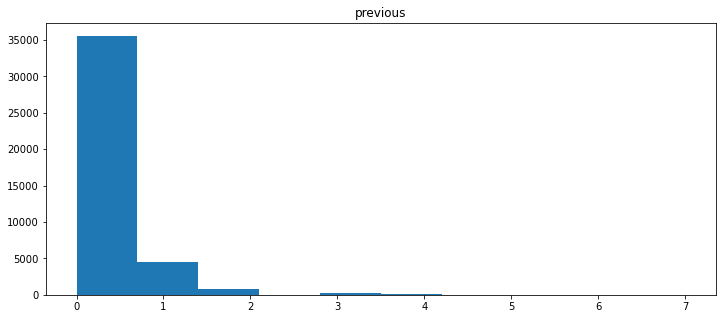

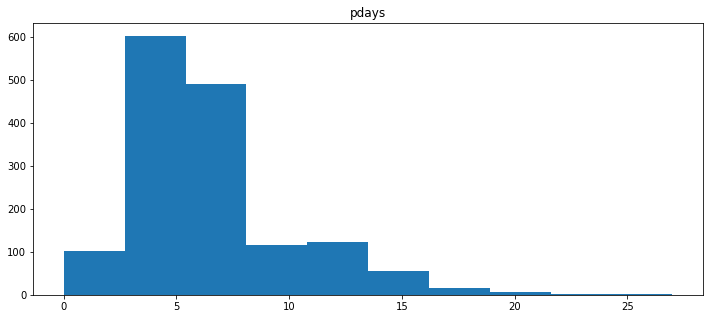

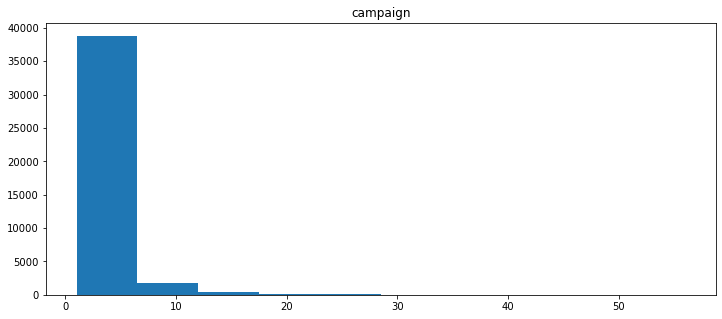

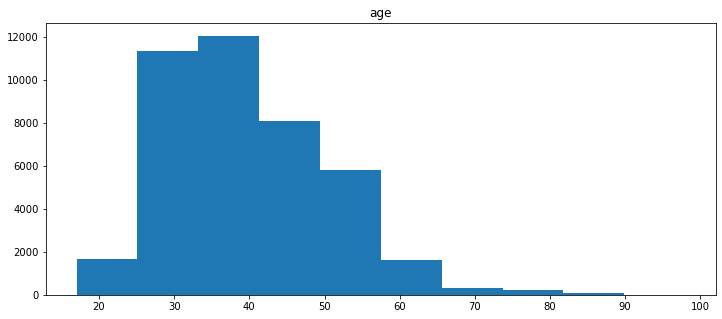

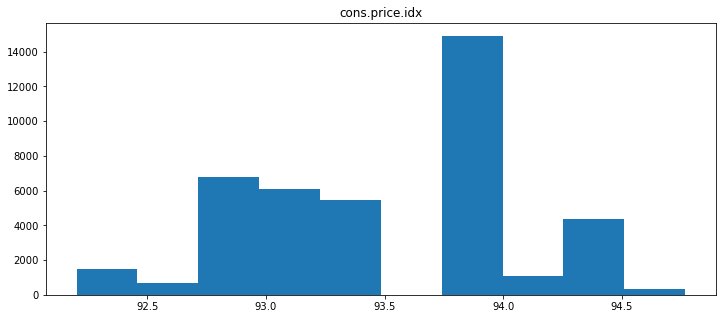

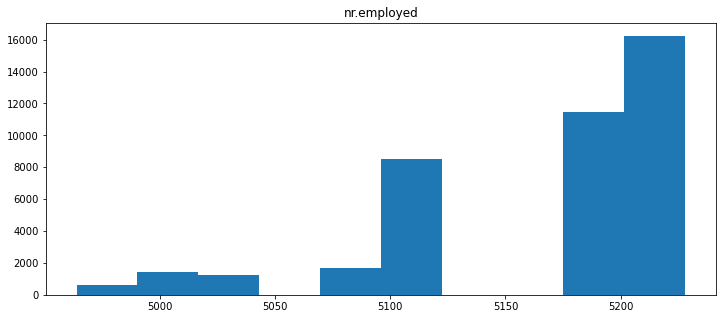

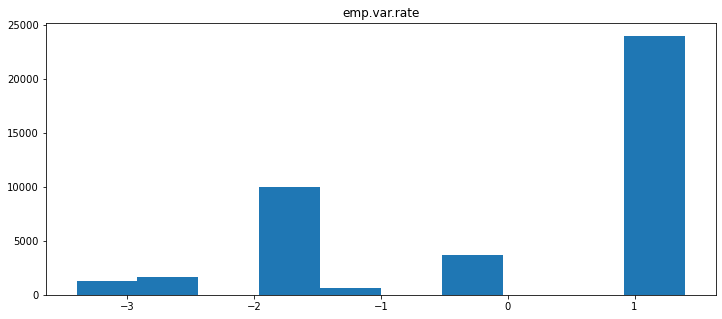

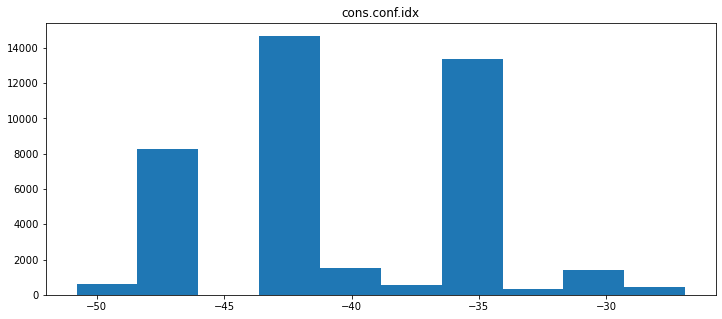

In [22]:
# PLot histograms of features
for col in numerical_variables:
    fig=plt.figure(figsize=(12,5))
    ax=fig.gca()
    ax.hist(df[col])
    ax.set_title(col)

In [23]:
# Check skewness
df[numerical_variables].skew()

education        -0.499051
euribor3m        -0.709188
previous          3.832042
pdays             1.458564
campaign          4.762507
age               0.784697
cons.price.idx   -0.230888
nr.employed      -1.044262
emp.var.rate     -0.724096
cons.conf.idx     0.303180
dtype: float64

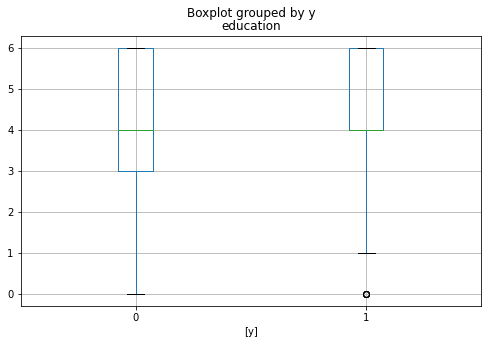

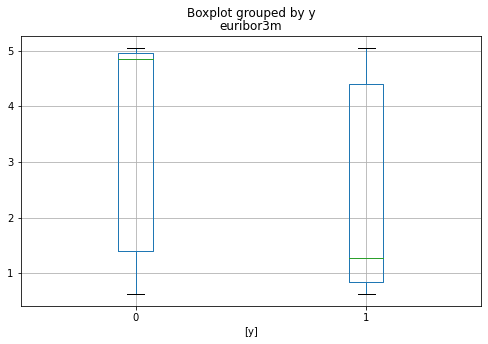

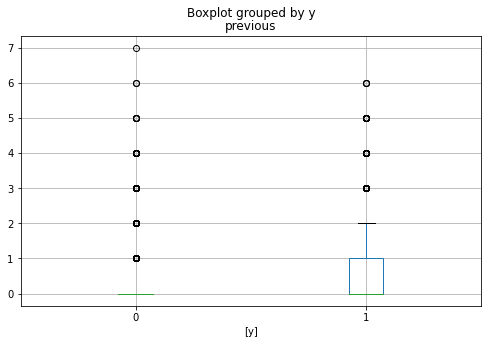

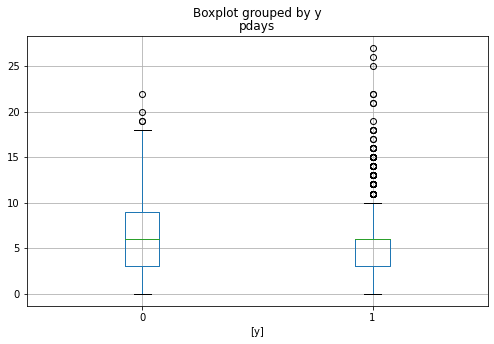

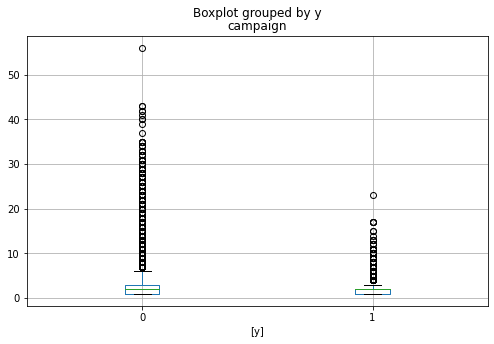

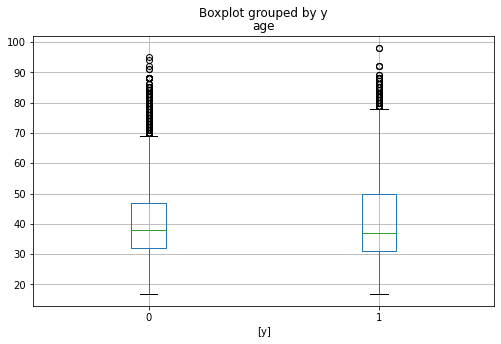

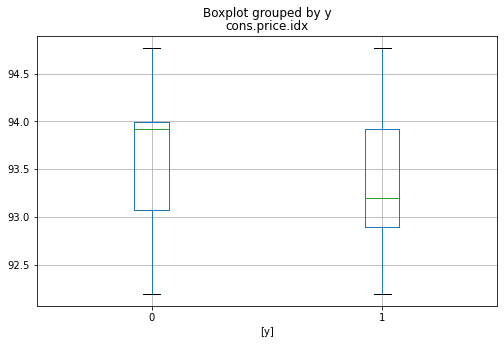

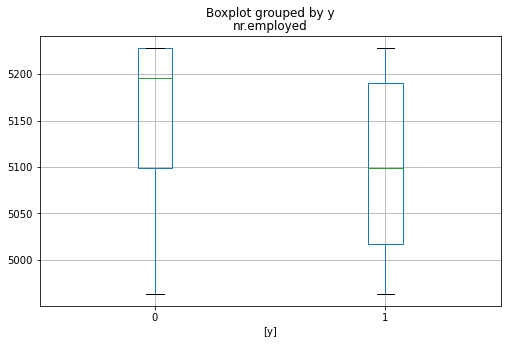

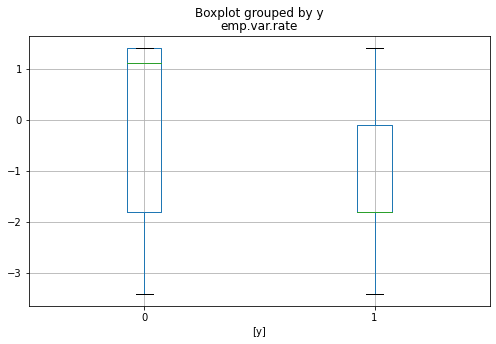

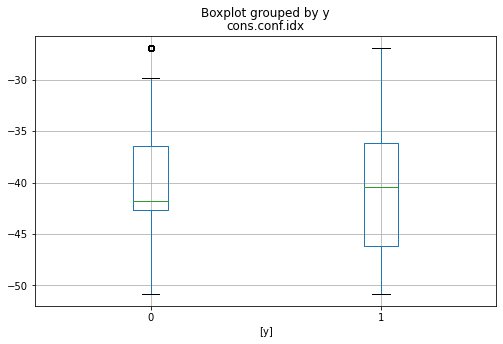

In [24]:
# Drow distibutions of numerical features by target
for col in numerical_variables:            
    fig = plt.figure(figsize=(8,5))
    fig.clf()
    ax = fig.gca() 
    df.boxplot(column=[col], ax=ax, by=['y'])     


#### Findings
* there are 3 skewed features: "previous", "campaing", "pdays". It may be worth testing if using logaritm of those feature will improve model accuracy
* for some features distibution is different depending on target. These may be good features for model:
    * emp.var.rate - for group of customers who subrscribed the product mean employee variation rate is lower
    * euribor3M - there are more customers subscribing the product when the euribor 3m rtae is lower
    * nr.empoyed - there are were customers subscribing the product when number of employees was lower

In [25]:
# I'll add logaritms of the shewed features to see if it's better correlated with the target
for col in ["previous", "campaign", "pdays"]:
    df[f"{col}_log"] = np.log(df[col])

### 5. Data correlation

<AxesSubplot:title={'center':'Correlation Matrix'}>

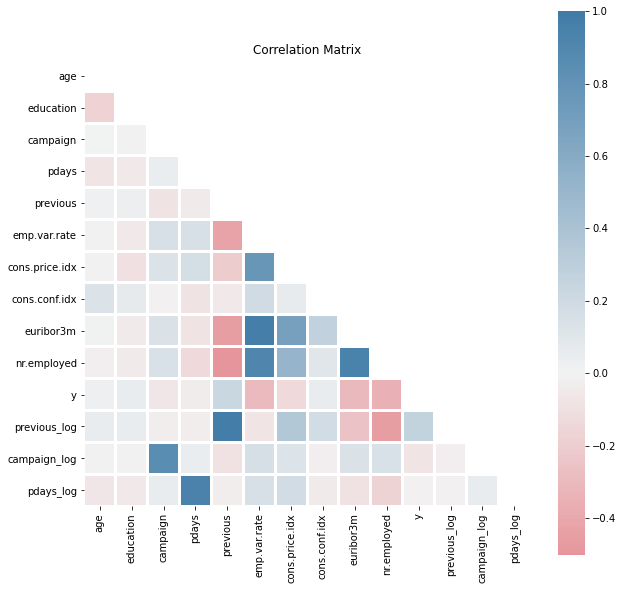

In [26]:
# Draw data correlation matrix
dd.correlation_matrix(df)

In [27]:
# Check highly correlated features- separman correlartion > 0.9
corrs = df.corr(method='spearman').abs().unstack()[df.corr(method='spearman').abs().unstack()>0.9].reset_index()
corrs = corrs[corrs['level_0'] != corrs['level_1']]
corrs

,level_0,level_1,0
3,campaign,campaign_log,1.000000
5,pdays,pdays_log,1.000000
7,previous,previous_log,1.000000
9,emp.var.rate,euribor3m,0.939915
10,emp.var.rate,nr.employed,0.944702
13,euribor3m,emp.var.rate,0.939915
15,euribor3m,nr.employed,0.928857
16,nr.employed,emp.var.rate,0.944702
17,nr.employed,euribor3m,0.928857
20,previous_log,previous,1.000000


In [28]:
# Check features correlation with target
df.corr(method='spearman')["y"].sort_values(ascending=False, key=lambda x: abs(x))

y                 1.000000
nr.employed      -0.283957
euribor3m        -0.266822
previous_log      0.259099
emp.var.rate     -0.247480
previous          0.200914
cons.price.idx   -0.122187
campaign         -0.063668
campaign_log     -0.063668
education         0.056074
cons.conf.idx     0.041229
pdays            -0.022348
pdays_log        -0.021752
age              -0.011861
Name: y, dtype: float64

#### Findings
* there are 3 highly correlated features: "emp.var.rate", "euribor3m", "nr.employed". Multicollinearity can make it harder to understand which varibale is statistically significant. A few correlated features do not add value to the model. To avoid this I will use in modelling only 1 of those features- the one that has the highest correlation with the target - nr.employed
* Using logaritm of feature improved correlation with target only for feature "previous". I will transorm this feature in data engineering phase
* There are a few features moderately correlated with the variable:
    * positive correlation (the higher the feature the more probabble thaat customer will subscribe product): 
        * "previous"- if the customer was concated multiple times it is more likely they will subscribe
    * negative:
        * "nr.employeed" - there were less subscriptions when the number of employees was higher
        * "euribor3m" - the higher the euribor3m the less subscriptions made
        * "emp.var.rate" - the higher the emp.var.rate the less subscriptions made